In [1]:
$LOAD_PATH << File.dirname(__FILE__) + "/../lib"

require 'pandas'
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
pd = Pandas
plt = Matplotlib::Pyplot

require 'beer'
include Beer

#<Module:0x00000001058ec780>

# モルトエキスの希釈度合いによる数値の変化

In [2]:
# モルトエキスの希釈度合いによる比重、Brix、予想アルコール度数の変化
attenuation = 0.75

batch_sizes = []
data = []

(4..20).each do |i|
  wort = Wort.new
             .add(1_700, Ingredient::MALT_EXTRACT)
             .fit(i * 1_000)
  ingredient = wort.to_ingredient

  batch_sizes << i
  data << [
    ingredient.sg,
    ingredient.brix,
    ingredient.abv(attenuation) * 100,
  ]
end

columns = ["Specific Gravity", "Brix", "Alcohol by value"]
df = Pandas::DataFrame.new(data, index: batch_sizes, columns: columns)
df.index.name = "Batch Size"
df

,Specific Gravity,Brix,Alcohol by value
Batch Size,,,
4,1.130900,30.368872,13.302846
5,1.104720,24.802179,10.642277
6,1.087267,20.962054,8.868564
7,1.074800,18.152107,7.601626
8,1.065450,16.006545,6.651423
9,1.058178,14.314553,5.912376
10,1.052360,12.946019,5.321138
11,1.047600,11.816267,4.837398
12,1.043633,10.867811,4.434282


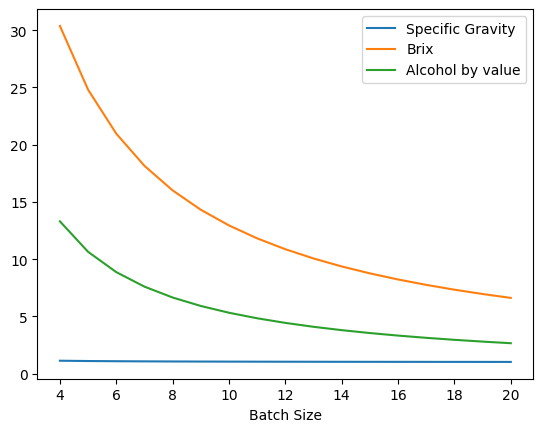

In [3]:
plt.figure
plt.plot(df, label: df.columns)
plt.legend
plt.xlabel("Batch Size")
plt.show